In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/User/Desktop/Titanic-Dataset.csv')
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

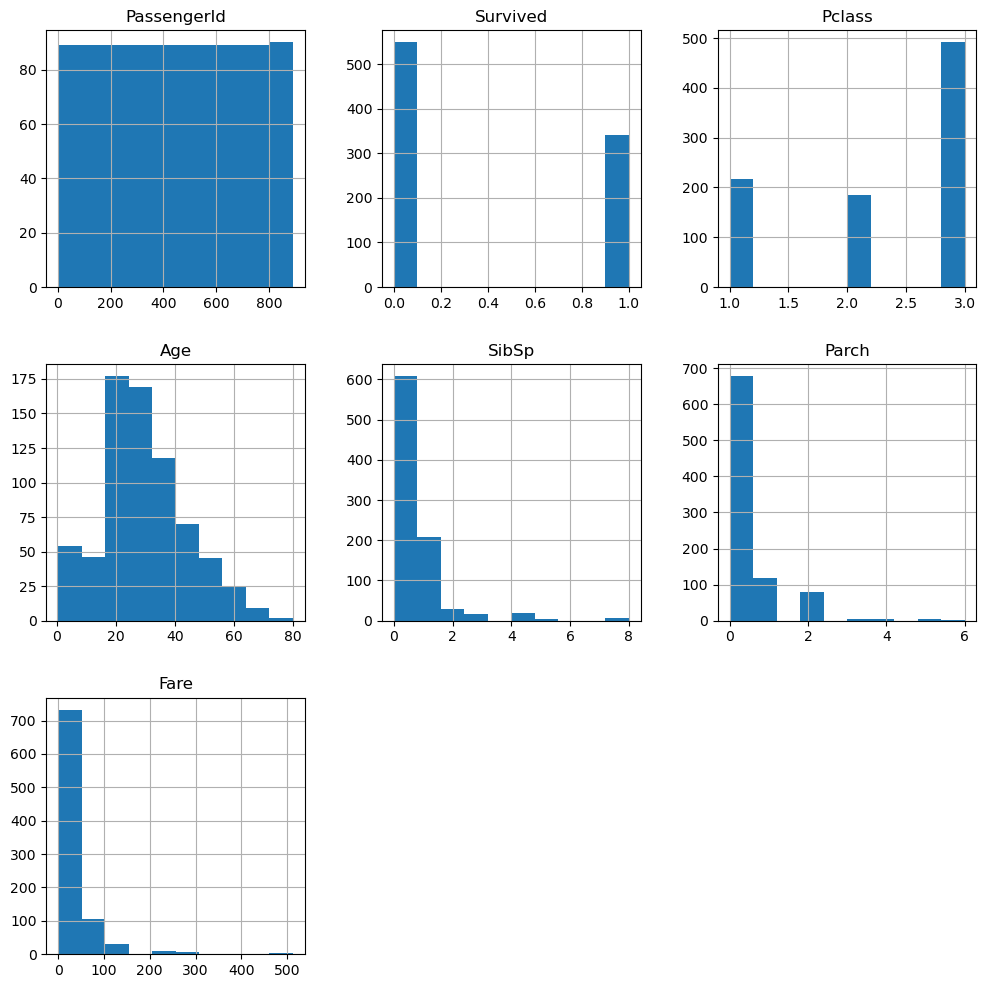

In [8]:
plt.rcParams['figure.figsize'] = [12, 12]
df.hist()

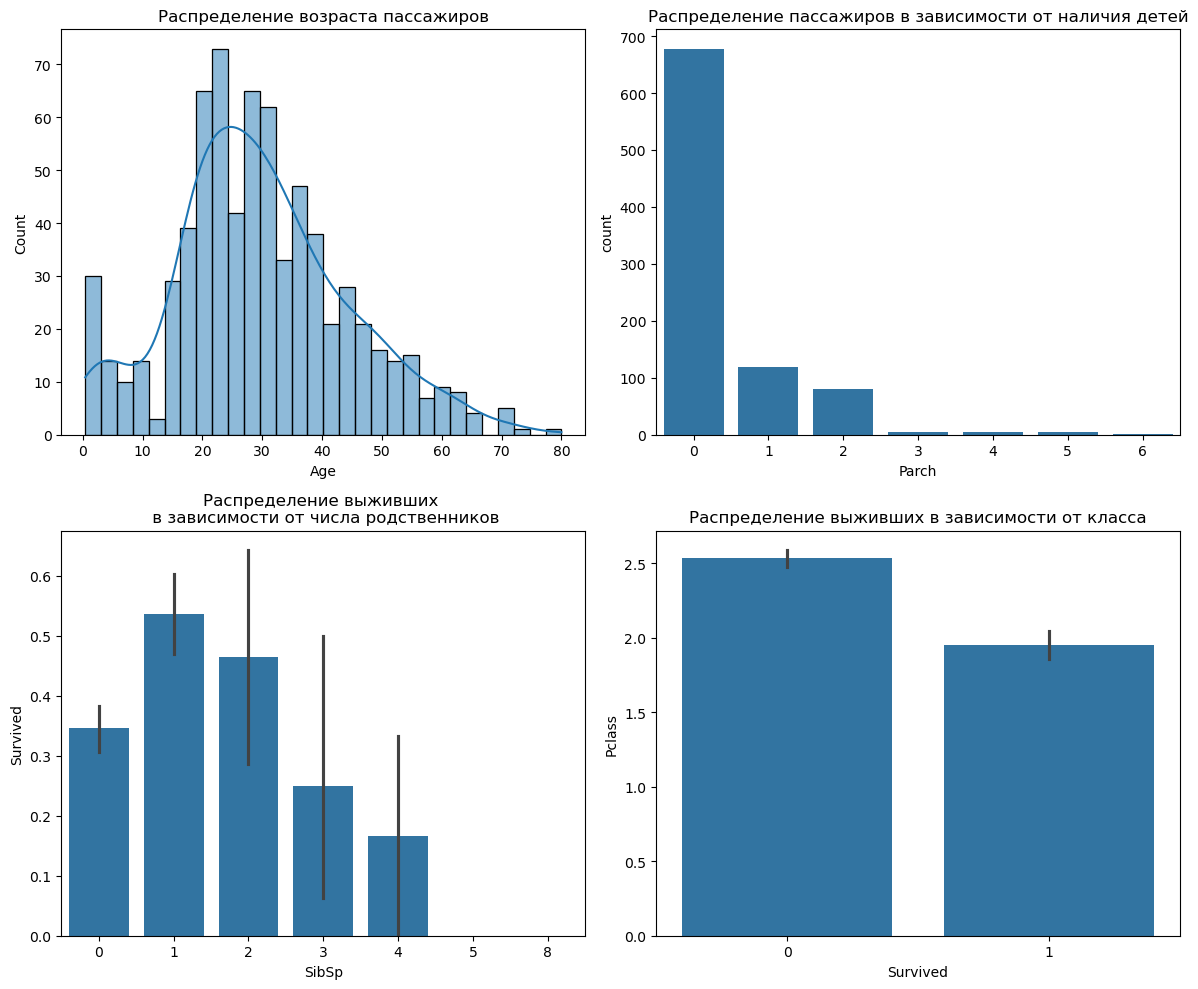

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data=df, x="Age", kde=True, ax=axes[0,0], bins=30) 
axes[0,0].set_title("Распределение возраста пассажиров")
sns.countplot(data=df, x="Parch", ax=axes[0,1])
axes[0,1].set_title("Распределение пассажиров в зависимости от наличия детей")
sns.barplot(data=df, x="SibSp", y="Survived", estimator="mean", ax=axes[1,0])
axes[1,0].set_title("Распределение выживших \n в зависимости от числа родственников")
sns.barplot(data=df, x="Survived", y = "Pclass", ax=axes[1,1], estimator="mean")
axes[1,1].set_title("Распределение выживших в зависимости от класса")
plt.tight_layout()
plt.show()

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


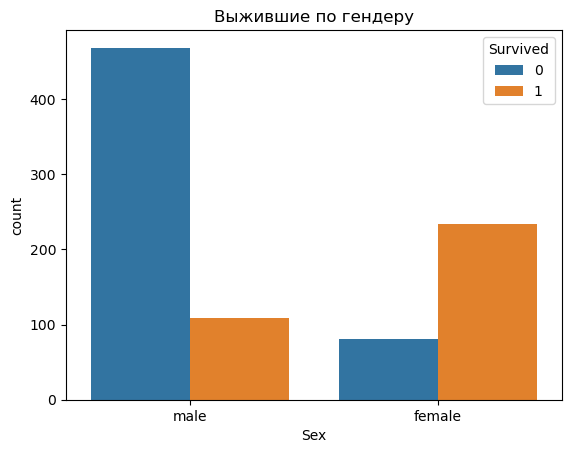

In [5]:
plt.figure()
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Выжившие по гендеру')
plt.show()

In [2]:
df.loc[df.Sex == 'female', 'Sex'] = 1
df.loc[df.Sex == 'male', 'Sex'] = 0

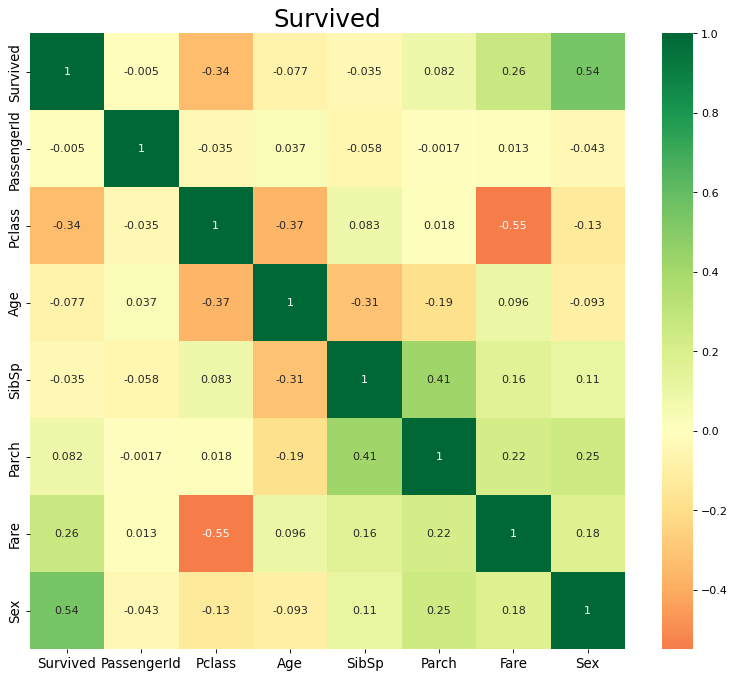

In [7]:
heatdf = df[['Survived', 'PassengerId','Pclass', 'Age','SibSp','Parch','Fare', 'Sex']]

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(heatdf.corr(), xticklabels=heatdf.corr().columns, yticklabels=heatdf.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Survived', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df[['Age']].copy()
y = df['Survived'].copy()
X['Age'] = X['Age'].fillna(X['Age'].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train = X_train['Age'].values / 100.0
y_train_array = y_train.values
m, alpha, epochs = len(y_train_array), 0.01, 2000
b0 = b1 = 0.0

for i in range(epochs):
    y_pred = b0 + b1 * x_train
    error = y_pred - y_train_array
    b0 -= alpha * (2/m) * np.sum(error)
    b1 -= alpha * (2/m) * np.sum(x_train * error)
    if i % 250 == 0:
        mse_current = np.mean(error ** 2)
        print(f"Итерация {i}:")
        print(f"  b0 = {b0:.6f}, b1 = {b1:.6f}")
        print(f"  Градиенты: db0 = {(2/m)*np.sum(error):.6f}, db1 = {(2/m)*np.sum(x_train*error):.6f}")
        print("-" * 40)
        
b1_original, b0_original = b1 / 100.0, b0
mse_train = np.mean((y_train_array - (b0_original + b1_original * X_train['Age'].values))**2)
mse_test = np.mean((y_test.values - (b0_original + b1_original * X_test['Age'].values))**2)

print(f"Свободный член: {b0_original:.6f}")
print(f"Коэффициент наклона: {b1_original:.6f}")
print(f"MSE train: {mse_train:.6f}")
print(f"MSE test: {mse_test:.6f}")

Итерация 0:
  b0 = 0.007528, b1 = 0.002137
  Градиенты: db0 = -0.752809, db1 = -0.213731
----------------------------------------
Итерация 250:
  b0 = 0.350118, b1 = 0.080699
  Градиенты: db0 = -0.005507, db1 = 0.007241
----------------------------------------
Итерация 500:
  b0 = 0.357321, b1 = 0.061493
  Градиенты: db0 = -0.002251, db1 = 0.007543
----------------------------------------
Итерация 750:
  b0 = 0.362711, b1 = 0.043345
  Градиенты: db0 = -0.002071, db1 = 0.006982
----------------------------------------
Итерация 1000:
  b0 = 0.367692, b1 = 0.026554
  Градиенты: db0 = -0.001916, db1 = 0.006460
----------------------------------------
Итерация 1250:
  b0 = 0.372300, b1 = 0.011019
  Градиенты: db0 = -0.001773, db1 = 0.005976
----------------------------------------
Итерация 1500:
  b0 = 0.376564, b1 = -0.003354
  Градиенты: db0 = -0.001640, db1 = 0.005529
----------------------------------------
Итерация 1750:
  b0 = 0.380509, b1 = -0.016651
  Градиенты: db0 = -0.001518, db1

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Age']].values
y = df['Survived'].values

X = np.where(np.isnan(X), np.nanmedian(X), X)#пропуски

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Свободный член: {model.intercept_:.4f}")
print(f"Коэффициент наклона: {model.coef_[0]:.6f}")

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f"MSE train: {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"MSE test: {mean_squared_error(y_test, y_pred_test):.4f}")

Свободный член: 0.4293
Коэффициент наклона: -0.001811
MSE train: 0.2342
MSE test: 0.2415
